## <center>K-means implementation</center>

In [38]:
import pandas as pd  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score  

In [39]:
fromages_data = pd.read_csv("fromages.txt", sep="\t")

In [40]:
fromages_data = pd.DataFrame(fromages_data)

In [41]:
data = fromages_data.iloc[:, 1:].values  # Sélectionne toutes les colonnes sauf 'Fromages'

In [42]:
def k_means(data, k=3):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_ #Récupération des labels
    centroids = kmeans.cluster_centers_
    fromages_data['Cluster'] = labels 
       # Calcule des métriques  
    inertia = kmeans.inertia_  
    silhouette_avg = silhouette_score(data, labels)  
    
    print("\nInertie : ", inertia)  
    print("Silhouette Score : ", silhouette_avg) 
    print("Labels des clusters :")  
    print(fromages_data[['Fromages', 'Cluster']])  
    print("\nCentroids des clusters :")  
    print(centroids)  

    # Seulement pour les données avec 2 caractéristiques pour simplifier (utilisation de PCA ou sélection manuelle)  
    if data.shape[1] >= 2:  
        plt.figure(figsize=(10, 6))  
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')  
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')  # Centroids en rouge  
        plt.title('Clustering K-means des fromages')  
        plt.xlabel('Calories')  
        plt.ylabel('Sodium')  
        plt.legend()  
        plt.show()  
    else:  
        print("Visualisation possible uniquement pour des données à 2 dimensions.")   


/home/kevin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Inertie :  247732.05644444446
Silhouette Score :  0.3729977070710403
Labels des clusters :
              Fromages  Cluster
0          CarredelEst        2
1              Babybel        2
2             Beaufort        0
3                 Bleu        2
4            Camembert        2
5               Cantal        0
6            Chabichou        2
7             Chaource        2
8              Cheddar        0
9                Comte        0
10         Coulomniers        2
11                Edam        0
12            Emmental        0
13  Fr.chevrepatemolle        1
14         Fr.fondu.45        2
15      Fr.frais20nat.        1
16      Fr.frais40nat.        1
17           Maroilles        2
18             Morbier        2
19            Parmesan        0
20       Petitsuisse40        1
21         PontlEveque        2
22            Pyrenees        2
23           Reblochon        2
24          Rocquefort        2
25         SaintPaulin        0
26                Tome        2
27          

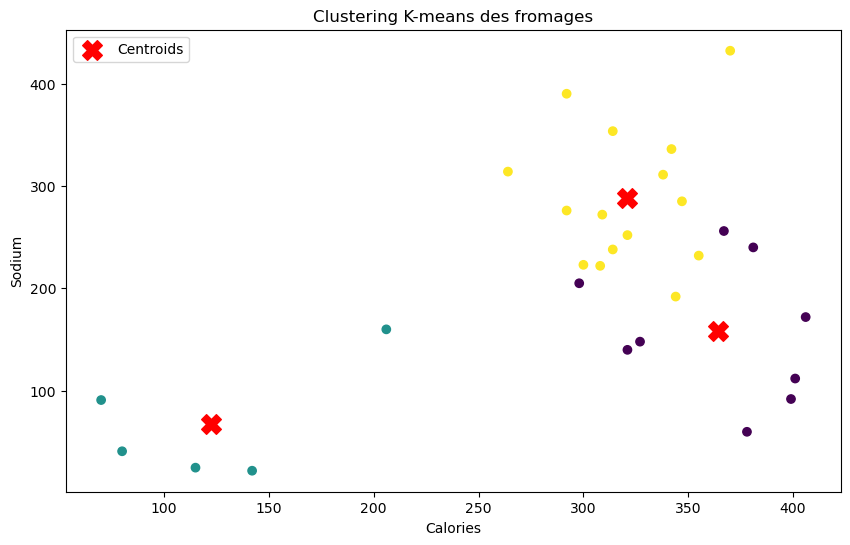

In [43]:
k_means(data)